In [1]:
from matplotlib import pyplot as plt
import sys
import numpy as np
import cv2 as cv
from PIL import Image
import time

bw = "images\black-white.png"
col = "images\colored.png" 
img_bw = cv.imread(bw)
img_col = cv.imread(col)

(-0.5, 725.5, 549.5, -0.5)

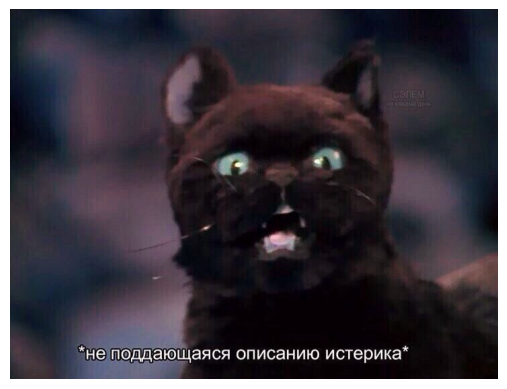

In [2]:
plt.imshow(img_col)
plt.axis('off')

In [3]:
# с использованием библиотеки
def to_black_white_cv(image):
    img = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    return img

# без использования библиотеки
def to_black_white(arr):
    x, y, _ = arr.shape
    
    k = np.array([[[0.2989, 0.587, 0.114]]])
    arr2 = np.round(np.sum(arr*k, axis=2)).astype(np.uint8).reshape((x, y))
    # arr2 = np.dot(arr[...,:3], k).astype(np.uint8)

    return arr2

Time for to_black_white_cv is  0.016265869140625


(-0.5, 725.5, 549.5, -0.5)

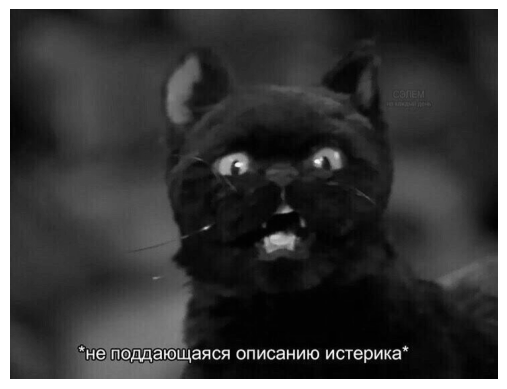

In [4]:
start = time.time()

img = to_black_white_cv(img_col)

end = time.time()
print("Time for to_black_white_cv is ", end - start)

plt.imshow(img, cmap='gray')
plt.axis('off')

Time for to_black_white is  0.018377065658569336


(-0.5, 725.5, 549.5, -0.5)

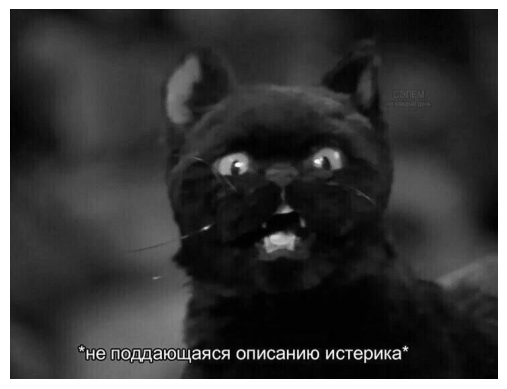

In [5]:
image = Image.open(col).convert('RGB') 
arr = np.asarray(image, dtype='uint8')

start = time.time()

img = to_black_white(img_col)

end = time.time()
print("Time for to_black_white is ", end - start)

plt.imshow(img, cmap='gray')
plt.axis('off')

In [6]:
def binarization_with_threshold_cv(img, threshold=127):
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    ret, img = cv.threshold(img, threshold, 255, 0)

    return img

(-0.5, 725.5, 549.5, -0.5)

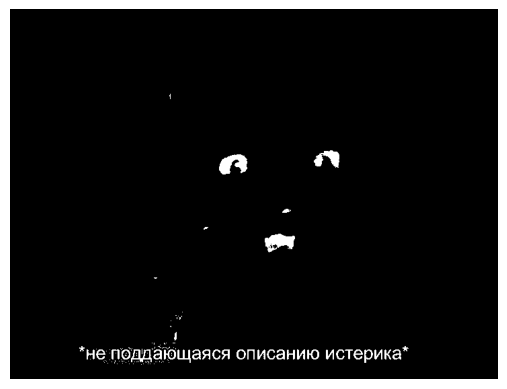

In [7]:
img = binarization_with_threshold_cv(img_col)
plt.imshow(img, cmap='gray')
plt.axis('off')

(-0.5, 725.5, 549.5, -0.5)

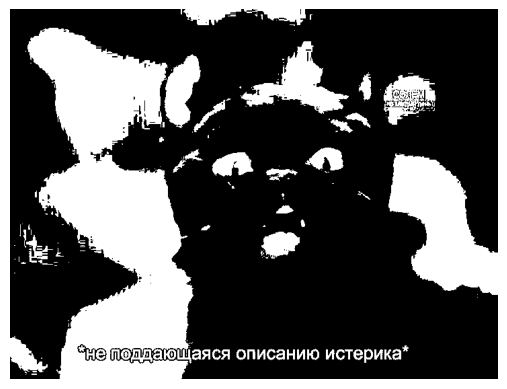

In [8]:
img = binarization_with_threshold_cv(img_col, 55)
plt.imshow(img, cmap='gray')
plt.axis('off')

In [9]:
from skimage.filters import threshold_local

# с использованием библиотеки
def binarization_cv(image_path, block_size=21, C=10):
    image = cv.imread(image_path)
    gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    binary_image = cv.adaptiveThreshold(gray_image, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, block_size, C)
    return binary_image

Time for binarization_cv is  0.01689314842224121


(-0.5, 725.5, 549.5, -0.5)

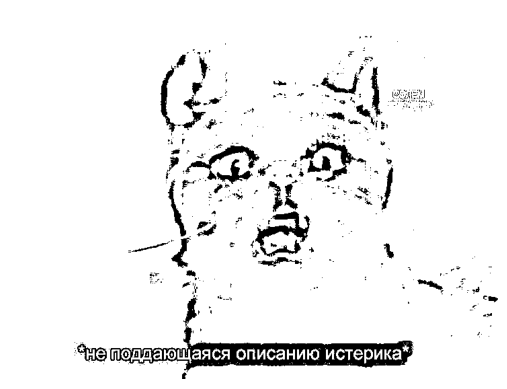

In [10]:
start = time.time()

binary_image = binarization_cv(col, C=8)

end = time.time()
print("Time for binarization_cv is ", end - start)

plt.imshow(binary_image, cmap='gray')
plt.axis('off')

In [11]:
# без использования библиотеки
def binarization(image, block_size=21, C=10):

    arr = to_black_white(image)
    
    height, width = arr.shape
    
    binary_image = np.zeros((height, width), dtype='uint8')
    
    half_block = block_size // 2
    
    for i in range(height):
        for j in range(width):
            y1 = max(0, i - half_block)
            y2 = min(height, i + half_block + 1)
            x1 = max(0, j - half_block)
            x2 = min(width, j + half_block + 1)
            
            block = arr[y1:y2, x1:x2]
            
            mean = np.mean(block)
            
            if arr[i, j] > mean - C:
                binary_image[i, j] = 255
            else:
                binary_image[i, j] = 0
    
    return binary_image


Time for binarization is  9.465188026428223


(-0.5, 725.5, 549.5, -0.5)

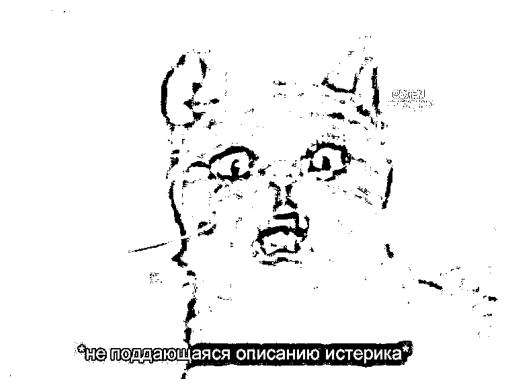

In [17]:
image = Image.open(col).convert('RGB') 
arr = np.asarray(image, dtype='uint8')

start = time.time()

binary_image = binarization(arr, C=8)

end = time.time()
print("Time for binarization is ", end - start)

plt.imshow(binary_image, cmap='gray')
plt.axis('off')

In [13]:
from numba import jit

# с использованием Numba
@jit
def to_black_white_jit(image):
    x, y, _ = image.shape
    arr = np.zeros((x, y), dtype=np.uint8)
    
    for i in range(x):
        for j in range(y):
            r = image[i, j, 0]
            g = image[i, j, 1]
            b = image[i, j, 2]
            gray = 0.2989 * r + 0.587 * g + 0.114 * b
            arr[i, j] = int(gray)
    
    return arr

# с использованием Numba
@jit
def binarization_jit(image, block_size=20, C=10):
    height, width = image.shape
    
    binary_image = np.zeros((height, width), dtype='uint8')
    
    half_block = block_size // 2
    
    
    for i in range(height):
        for j in range(width):
            y1 = max(0, i - half_block)
            y2 = min(height, i + half_block + 1)
            x1 = max(0, j - half_block)
            x2 = min(width, j + half_block + 1)
            
            block = image[y1:y2, x1:x2]
            
            mean = np.mean(block)
            
            if image[i, j] > mean - C:
                binary_image[i, j] = 255
            else:
                binary_image[i, j] = 0
    
    return binary_image


Time for to_black_white_jit is  0.0019943714141845703
Time for only binarization_jit is  0.4585740566253662


(-0.5, 725.5, 549.5, -0.5)

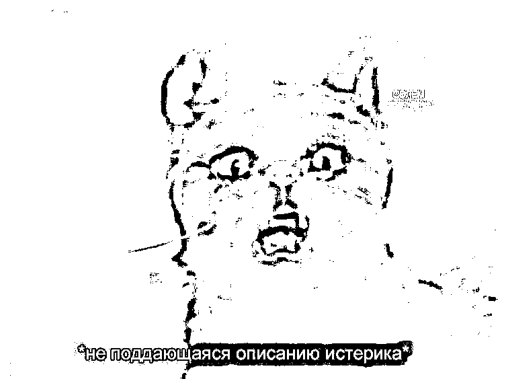

In [15]:
image = Image.open(col).convert('RGB') 
arr = np.asarray(image, dtype='uint8')

start = time.time()

gray_image = to_black_white_jit(arr)

end = time.time()
print("Time for to_black_white_jit is ", end - start)

start = time.time()

binary_image = binarization_jit(gray_image, C=8)

end = time.time()
print("Time for only binarization_jit is ", end - start)

plt.imshow(binary_image, cmap='gray')
plt.axis('off')